# Introduction
This calculates the mean number of harmonies per segment for different segment-sizes, and then plots those results as line graphs.

### Imports
Import libraries and write settings here.

In [1]:
from music21 import *
import os
import csv
import itertools as it
from collections import Counter
from operator import itemgetter
from collections import OrderedDict
import statistics
import numpy as np
import pandas as pd
import chart_studio.plotly as py
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)
import statsmodels
import plotly.express as px
from IPython.display import Image
import math

# Vertical

In [2]:
## load corpus

properCorpus = corpus.corpora.LocalCorpus('DPhilCorpus')
properCorpus.existsInSettings

properCorpus.addPath('~/Desktop/Oxford/Corpus/Sounding Corpus (Movements)/XML/')
properCorpus.directoryPaths

properCorpus.save()
properCorpus.existsInSettings

/opt/anaconda3/lib/python3.7/site-packages/music21/corpus/corpora.py: WARNING: DPhilCorpus metadata cache: starting processing of paths: 107
/opt/anaconda3/lib/python3.7/site-packages/music21/corpus/corpora.py: WARNING: cache: filename: /var/folders/cr/p20lv70n2wbf2w8jfmxbh69w0000gp/T/music21/local-DPhilCorpus.p.gz
bundles.py: WARNING: MetadataBundle Modification Time: 1608743738.4913
bundles.py: WARNING: Skipped 107 sources already in cache.
/opt/anaconda3/lib/python3.7/site-packages/music21/corpus/corpora.py: WARNING: cache: writing time: 0.125 md items: 107

/opt/anaconda3/lib/python3.7/site-packages/music21/corpus/corpora.py: WARNING: cache: filename: /var/folders/cr/p20lv70n2wbf2w8jfmxbh69w0000gp/T/music21/local-DPhilCorpus.p.gz


True

In [3]:
## organise corpus

pieceName = []

listOfWorks = properCorpus.search('Op.')
for el in listOfWorks:
    pieceName.append(el.sourcePath)

In [4]:
## compile data

list_of_total_info = []
for el in pieceName:
    thePiece = corpus.parse(el)
    fileTitle = str(el).replace("/Users/joshua ballance/Desktop/Oxford/Corpus/Sounding Corpus (Movements)/XML/", "").replace(".xml", "").replace(".mxl", "")
    opusNumber = fileTitle.replace("Op.", "").replace(" ", "").replace("i", "").replace("v", "")
    movementNumber = fileTitle.replace("Op.", "").replace(" ", "").replace("1", "").replace("2", "").replace("3", "").replace("4", "").replace("5", "").replace("6", "").replace("7", "").replace("8", "").replace("9", "").replace("0", "")
    chordifiedPiece = thePiece.chordify()
    chords = chordifiedPiece.flat.recurse().getElementsByClass('Chord')
    rests = chordifiedPiece.flat.recurse().getElementsByClass('Chord')
    listOfOffsetsandDurations = []
    for i in range(0, len(chords)-1):
        temp = []
        offset_position = chords[i].offset
        list_of_duration_values = []
        for j in chords:
            if j.offset < offset_position:
                list_of_duration_values.append(j.seconds)
        for k in rests:
            if k.offset < offset_position:
                list_of_duration_values.append(k.seconds)
        listOfOffsetsandDurations.append([sum(list_of_duration_values), chords[i].seconds])
    all_chord_durations = []
    all_rest_durations = []
    for l in chords:
        all_chord_durations.append(l.seconds)
    for m in rests:
        all_rest_durations.append(m.seconds)
    temp = []
    temp.append(fileTitle)
    temp.append(listOfOffsetsandDurations)
    temp.append(sum(all_chord_durations)+sum(all_rest_durations))
    list_of_total_info.append(temp)

In [5]:
## organise data

list_of_results = []
for el in range(1, 51):
    list_of_temp_results = []
    for i in list_of_total_info:
        total_offsets_range = i[2]/el
        offsets_partitions = []
        for j in range(0, el+1):
            offsets_partitions.append(j*total_offsets_range)
        list_of_partitioned_verticality_values = []

        for l in range(0, len(offsets_partitions)):
            temp = []
            for k in i[1]:
                val = k[0]
                if val > offsets_partitions[l]:
                    if val <= offsets_partitions[l+1]:
                        temp.append(1)
            list_of_partitioned_verticality_values.append(temp)

        list_of_partition_number_counts = []

        for k in list_of_partitioned_verticality_values:
            list_of_partition_number_counts.append(sum(k))

        mean_verticalities = statistics.mean(list_of_partition_number_counts)
        list_of_temp_results.append(mean_verticalities)
    mean_result = statistics.mean(list_of_temp_results)
    list_of_results.append([el, mean_result])

vertical_segment_means = pd.DataFrame(list_of_results, columns=['Segments', 'Mean Verticalities'])

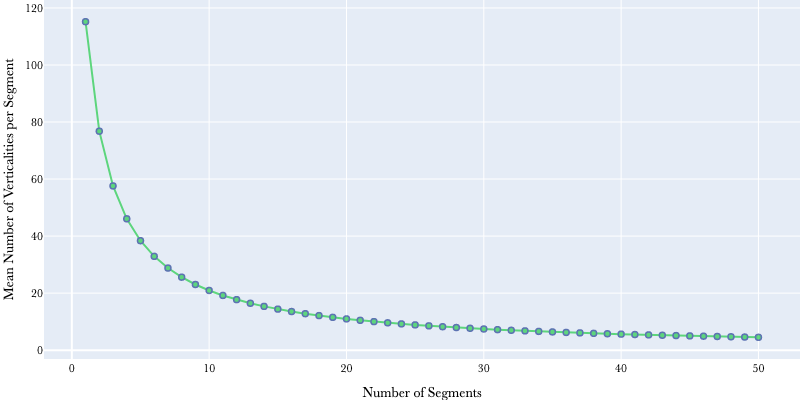

In [6]:
## plot results

fig = go.Figure(data=go.Scatter(x=vertical_segment_means["Segments"], y=vertical_segment_means["Mean Verticalities"],mode='lines+markers'))
fig.update_layout(xaxis=(dict(title={'text': 'Number of Segments'})))
fig.update_layout(yaxis=(dict(title={'text': 'Mean Number of Verticalities per Segment'})))
fig.update_traces(marker_color='rgb(3,199,45)', marker_line_color='rgb(3,35,134)', marker_line_width=1.5, opacity=0.6)
fig.update_layout(font=dict(family="Baskerville, monospace", size=12, color='rgb(0,0,0)'))
fig.update_layout(showlegend=False)
fig.update_layout(margin={'l': 0, 'r': 0, 't': 0, 'b': 0})
img_bytes = fig.to_image(format="png", width=800, height=400, scale=1)
fig.show()
Image(img_bytes)

# Linear

In [7]:
## load corpus

linear_corpus_trigrams = corpus.corpora.LocalCorpus('DPhilCorpus_Linear_Trigrams')
linear_corpus_trigrams.existsInSettings

linear_corpus_trigrams.addPath('~/Desktop/Oxford/Corpus/Sounding Corpus (Movements) Linear/Trigrams/XML/')
linear_corpus_trigrams.directoryPaths

linear_corpus_trigrams.save()
linear_corpus_trigrams.existsInSettings

/opt/anaconda3/lib/python3.7/site-packages/music21/corpus/corpora.py: WARNING: DPhilCorpus_Linear_Trigrams metadata cache: starting processing of paths: 107
/opt/anaconda3/lib/python3.7/site-packages/music21/corpus/corpora.py: WARNING: cache: filename: /var/folders/cr/p20lv70n2wbf2w8jfmxbh69w0000gp/T/music21/local-DPhilCorpus_Linear_Trigrams.p.gz
bundles.py: WARNING: MetadataBundle Modification Time: 1608737384.4031043
bundles.py: WARNING: Skipped 107 sources already in cache.
/opt/anaconda3/lib/python3.7/site-packages/music21/corpus/corpora.py: WARNING: cache: writing time: 0.135 md items: 107

/opt/anaconda3/lib/python3.7/site-packages/music21/corpus/corpora.py: WARNING: cache: filename: /var/folders/cr/p20lv70n2wbf2w8jfmxbh69w0000gp/T/music21/local-DPhilCorpus_Linear_Trigrams.p.gz


True

In [8]:
## organise corpus

pieceName = []

listOfWorks = linear_corpus_trigrams.search('Op.')
for el in listOfWorks:
    pieceName.append(el.sourcePath)

In [9]:
## compile data

list_of_total_info = []
for el in pieceName:
    thePiece = corpus.parse(el)
    fileTitle = str(el).replace("/Users/joshua ballance/Desktop/Oxford/Corpus/Sounding Corpus (Movements) Linear/Trigrams/XML/", "").replace(".xml", "").replace(".mxl", "")
    opusNumber = fileTitle.replace("Op.", "").replace(" ", "").replace("i", "").replace("v", "")
    movementNumber = fileTitle.replace("Op.", "").replace(" ", "").replace("1", "").replace("2", "").replace("3", "").replace("4", "").replace("5", "").replace("6", "").replace("7", "").replace("8", "").replace("9", "").replace("0", "")
    chordifiedPiece = thePiece.chordify()
    chords = chordifiedPiece.flat.recurse().getElementsByClass('Chord')
    rests = chordifiedPiece.flat.recurse().getElementsByClass('Chord')
    piece_duration = sum(i.seconds for i in chords)+sum(j.seconds for j in rests)
    
    three_note_list = []
    for h in range(0,len(thePiece.parts)):
        current_part = thePiece.parts[h]
        listOfNotes = current_part.flat.getElementsByClass(note.Note)
        listOfRests = current_part.flat.getElementsByClass(note.Rest)
        
        for i in range(0,len(listOfNotes)-2):
            temp_list_of_notes = []
            firstNote = listOfNotes[i]
            secondNote = listOfNotes[i+1]
            thirdNote = listOfNotes[i+2]
            rhythmicDifference = secondNote.offset-firstNote.offset
            if firstNote.quarterLength == rhythmicDifference:
                if 'start' in str(firstNote.tie):
                    pass
                elif 'stop' in str(secondNote.tie):
                    pass
                elif 'continue' in str(firstNote.tie):
                    pass
                elif 'continue' in str(secondNote.tie):
                    pass
                else:
                    temp_list_of_notes.append(firstNote)
                    temp_list_of_notes.append(secondNote)
                    rhythmicDifference = thirdNote.offset-secondNote.offset
                    if secondNote.quarterLength == rhythmicDifference:
                        if 'start' in str(secondNote.tie):
                            pass
                        elif 'stop' in str(thirdNote.tie):
                            pass
                        elif 'continue' in str(secondNote.tie):
                            pass
                        elif 'continue' in str(thirdNote.tie):
                            pass
                        else:
                            temp_list_of_notes.append(thirdNote)
                    else:
                        barNumber = thirdNote.measureNumber
                        singleBar = current_part.measure(barNumber)
                        barLength = singleBar.quarterLength
                        if rhythmicDifference < barLength/2:
                            temp_list_of_notes.append(thirdNote)
            else:
                barNumber = secondNote.measureNumber
                singleBar = current_part.measure(barNumber)
                barLength = singleBar.quarterLength
                if rhythmicDifference < barLength/2:
                    temp_list_of_notes.append(firstNote)
                    temp_list_of_notes.append(secondNote)
                    rhythmicDifference = thirdNote.offset-secondNote.offset
                    if secondNote.quarterLength == rhythmicDifference:
                        if 'start' in str(secondNote.tie):
                            pass
                        elif 'stop' in str(thirdNote.tie):
                            pass
                        elif 'continue' in str(secondNote.tie):
                            pass
                        elif 'continue' in str(thirdNote.tie):
                            pass
                        else:
                            temp_list_of_notes.append(thirdNote)
                    else:
                        barNumber = thirdNote.measureNumber
                        singleBar = current_part.measure(barNumber)
                        barLength = singleBar.quarterLength
                        if rhythmicDifference < barLength/2:
                            temp_list_of_notes.append(thirdNote)
            if len(temp_list_of_notes) == 3:
                three_note_list.append(temp_list_of_notes)
    normal_order_list = []
    listOfOffsetsandDurations = []
    for j in three_note_list:
        temp_chord = chord.Chord(j)
        offset_position = j[0].offset
        list_of_duration_values = []
        for k in chords:
            if k.offset < offset_position:
                list_of_duration_values.append(k.seconds)
        for l in rests:
            if l.offset < offset_position:
                list_of_duration_values.append(l.seconds)
        listOfOffsetsandDurations.append(sum(list_of_duration_values))
    
    temp = []
    temp.append(fileTitle)
    temp.append(listOfOffsetsandDurations)
    temp.append(piece_duration)
    list_of_total_info.append(temp)

In [10]:
## organise results

list_of_results = []
for el in range(1, 51):
    list_of_temp_results = []
    for i in list_of_total_info:
        total_offsets_range = i[2]/el
        offsets_partitions = []
        for j in range(0, el+1):
            offsets_partitions.append(j*total_offsets_range)
        list_of_partitioned_verticality_values = []

        for l in range(0, len(offsets_partitions)-1):
            temp = []
            for k in i[1]:
                val = k
                if val > offsets_partitions[l]:
                    if val <= offsets_partitions[l+1]:
                        temp.append(1)
            list_of_partitioned_verticality_values.append(temp)

        list_of_partition_number_counts = []

        for k in list_of_partitioned_verticality_values:
            list_of_partition_number_counts.append(sum(k))

        mean_verticalities = statistics.mean(list_of_partition_number_counts)
        list_of_temp_results.append(mean_verticalities)
    mean_result = statistics.mean(list_of_temp_results)
    list_of_results.append([el, mean_result])
        
df = pd.DataFrame(list_of_results, columns=['Segments', 'Mean Trichords'])

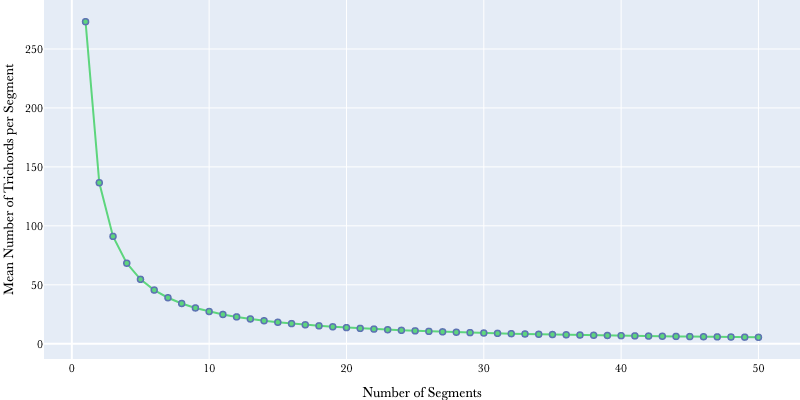

In [12]:
## plot results

fig = go.Figure(data=go.Scatter(x=df["Segments"], y=df["Mean Trichords"],mode='lines+markers'))
fig.update_layout(xaxis=(dict(title={'text': 'Number of Segments'})))
fig.update_layout(yaxis=(dict(title={'text': 'Mean Number of Trichords per Segment'})))
fig.update_traces(marker_color='rgb(3,199,45)', marker_line_color='rgb(3,35,134)', marker_line_width=1.5, opacity=0.6)
fig.update_layout(font=dict(family="Baskerville, monospace", size=12, color='rgb(0,0,0)'))
fig.update_layout(showlegend=False)
fig.update_layout(margin={'l': 0, 'r': 0, 't': 0, 'b': 0})
img_bytes = fig.to_image(format="png", width=800, height=400, scale=1)
fig.show()
Image(img_bytes)

# Combined

In [13]:
## combine results data

combined_segment_means_df = df
combined_segment_means_df['Mean Verticalities'] = vertical_segment_means['Mean Verticalities']

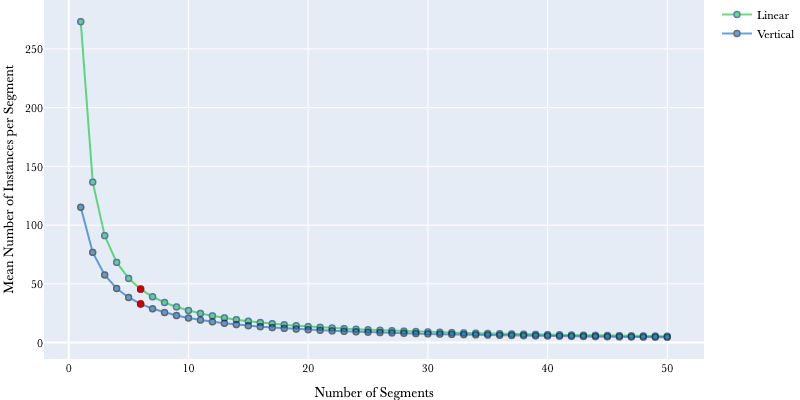

In [14]:
## plot combined results

fig = go.Figure()
fig.add_trace(go.Scatter(x=combined_segment_means_df['Segments'], y=combined_segment_means_df['Mean Trichords'],mode='lines+markers',name='Linear', marker_color='rgb(3,199,45)', marker_line_color='rgb(3,35,134)', marker_line_width=1.5, opacity=0.6))
fig.add_trace(go.Scatter(x=combined_segment_means_df['Segments'], y=combined_segment_means_df['Mean Verticalities'],mode='lines+markers',name='Vertical', marker_color='rgb(3,100,200)', marker_line_color='rgb(9,19,6)', marker_line_width=1.5, opacity=0.6))

fig.add_trace(go.Scatter(x=[6], y=[combined_segment_means_df['Mean Trichords'][5]],mode='markers', marker_color='rgb(200,0,0)', marker_line_color='rgb(200,0,0)', marker_line_width=1.5, showlegend=False))
fig.add_trace(go.Scatter(x=[6], y=[combined_segment_means_df['Mean Verticalities'][5]],mode='markers', marker_color='rgb(200,0,0)', marker_line_color='rgb(200,0,0)', marker_line_width=1.5, showlegend=False))

fig.update_layout(xaxis=(dict(title={'text': 'Number of Segments'})))
fig.update_layout(yaxis=(dict(title={'text': 'Mean Number of Instances per Segment'})))
fig.update_layout(font=dict(family="Baskerville, monospace", size=12, color='rgb(0,0,0)'))
fig.update_layout(margin={'l': 0, 'r': 0, 't': 0, 'b': 0})
img_bytes = fig.to_image(format="png", width=800, height=400, scale=1)
fig.show()
Image(img_bytes)
